<a href="https://colab.research.google.com/github/govardhan-06/ML-models/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### EDA + Data preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
#Null values
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [5]:
#Duplicate rows
duplicate = df[df.duplicated()]
duplicate

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


### Insights: No duplicates

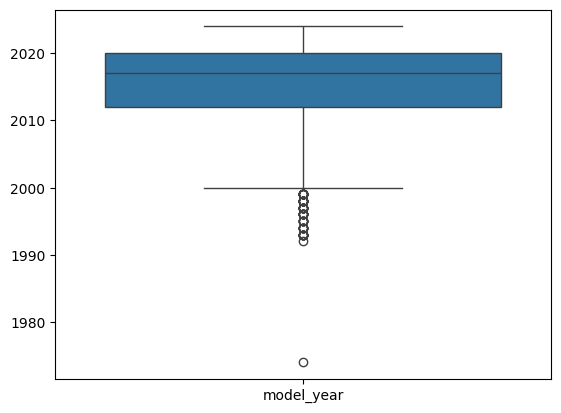

In [6]:
#Outiers
sns.boxplot(data=df)
plt.show()

### Insights: Absence of outliers

In [7]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### Handling Missing Values

In [8]:
df["clean_title"]=df["clean_title"].fillna("No")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [9]:
df['clean_title'].value_counts()

clean_title
Yes    3413
No      596
Name: count, dtype: int64

In [10]:
df["not_clean_title"]=pd.get_dummies(df["clean_title"],dtype=int,drop_first=True)
df.drop(["clean_title"],axis=1,inplace=True)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,not_clean_title
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,"$10,300",1
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,"$38,005",1
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598",0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,"$15,500",1
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,"$34,999",0


### Age of car

In [11]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Get the current year
current_year = now.year

# Calculate the age of the car
df['Age'] = current_year - df['model_year']

# Drop the 'Year' column
df.drop('model_year', axis=1, inplace=True)

df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,not_clean_title,Age
0,Ford,Utility Police Interceptor Base,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,"$10,300",1,11
1,Hyundai,Palisade SEL,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,"$38,005",1,3
2,Lexus,RX 350 RX 350,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598",0,2
3,INFINITI,Q50 Hybrid Sport,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,"$15,500",1,9
4,Audi,Q3 45 S line Premium Plus,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,"$34,999",0,3


### Type casting price to price in $

In [12]:
df["price (in $)"]=[int(i.strip("$").replace(",","")) for i in df['price']]
df.drop("price",axis=1,inplace=True)
df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $)
0,Ford,Utility Police Interceptor Base,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,1,11,10300
1,Hyundai,Palisade SEL,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,1,3,38005
2,Lexus,RX 350 RX 350,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,0,2,54598
3,INFINITI,Q50 Hybrid Sport,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,1,9,15500
4,Audi,Q3 45 S line Premium Plus,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,0,3,34999


### Typecasting mileage to mileage in mi.

In [13]:
df['mileage (in miles)']=[int(i.strip("mi.").replace(",","")) for i in df['milage']]
df.drop("milage",axis=1,inplace=True)
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,1,11,10300,51000
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,1,3,38005,34742
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,0,2,54598,22372
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,1,9,15500,88900
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,0,3,34999,9835


### Encoding Internal Color

In [14]:
df['int_col'].value_counts().index

Index(['Black', 'Beige', 'Gray', 'Brown', '–', 'White', 'Red', 'Jet Black',
       'Ebony', 'Blue',
       ...
       'Dark Auburn', 'Obsidian Black', 'Boulder', 'Caramel', 'Orchid',
       'Almond Beige', 'Kyalami Orange', 'Sakhir Orange', 'Tan/Ebony',
       'Black / Graphite'],
      dtype='object', name='int_col', length=156)

In [15]:
df['int_col'].isnull().sum()

0

In [16]:
#Target guided encoding
print("Grouping by mean of price:\n",df.groupby("int_col")["price (in $)"].mean().sort_values(ascending=False))
print("\n")
print("Grouping by median of price:\n",df.groupby("int_col")["price (in $)"].median().sort_values(ascending=False))

Grouping by mean of price:
 int_col
Charles Blue      695000.0
Cobalt Blue       599995.0
Black / Brown     489000.0
Brandy            479995.0
Grace White       449995.0
                    ...   
Carbon Black       17999.0
Light Titanium     17550.0
Ebony.             14798.0
Charcoal Black     11829.8
Dark Gray          11515.5
Name: price (in $), Length: 156, dtype: float64


Grouping by median of price:
 int_col
Charles Blue      695000.0
Cobalt Blue       599995.0
Black / Brown     489000.0
Brandy            479995.0
Grace White       449995.0
                    ...   
Gold               17750.0
Light Titanium     17550.0
Ebony.             14798.0
Charcoal Black     12599.0
Dark Gray          11515.5
Name: price (in $), Length: 156, dtype: float64


In [17]:
df['int_col'].value_counts()

int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64

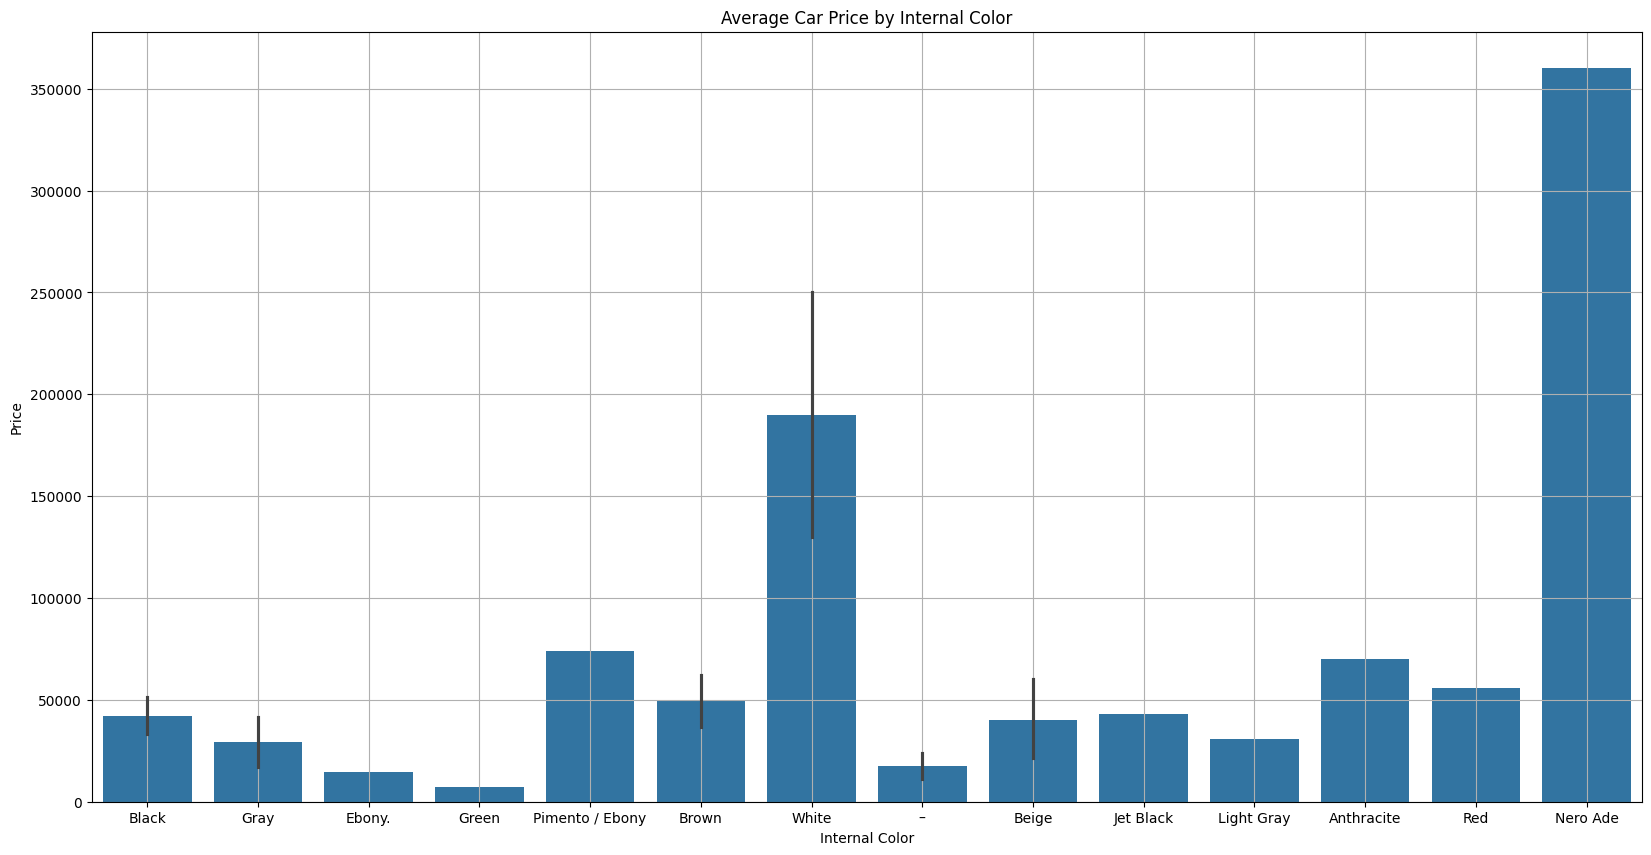

In [18]:
plt.figure(figsize=(20, 10))
sns.barplot(x=df["int_col"][:80], y=df["price (in $)"])
plt.title('Average Car Price by Internal Color')
plt.xlabel('Internal Color')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [19]:
#Frequency encoding
print("Grouping by count:\n",df["int_col"].value_counts())

Grouping by count:
 int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64


In [20]:
# #Targeted encoding
# intColPrice=df.groupby("int_col")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df['int_col']=df["int_col"].map(intColPrice)
# df.head()

In [21]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["int_col_encoded"]=le.fit_transform(df['int_col'])
df.drop("int_col",axis=1,inplace=True)
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,At least 1 accident or damage reported,1,11,10300,51000,14
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,At least 1 accident or damage reported,1,3,38005,34742,71
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,None reported,0,2,54598,22372,14
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,None reported,1,9,15500,88900,14
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,None reported,0,3,34999,9835,14


### Encoding external color

In [22]:
df['ext_col'].value_counts()

ext_col
Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64

In [23]:
df.groupby("ext_col")["price (in $)"].mean().sort_values(ascending=False)

ext_col
Tempest                   599995.0
Balloon White             449991.0
China Blue                425000.0
Bianco Isis               399900.0
BLU ELEOS                 359991.0
                            ...   
Kinetic Blue               12999.0
Crimson Red Tintcoat       12433.0
Quartz Blue Pearl          11498.0
Twilight Blue Metallic      9995.0
Frozen White                9985.0
Name: price (in $), Length: 319, dtype: float64

In [24]:
# #Targeted encoding
# extColPrice=df.groupby("ext_col")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df['ext_col']=df['ext_col'].map(extColPrice)
# df.head()

In [25]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["ext_col_encoded"]=le.fit_transform(df['ext_col'])
df.drop("ext_col",axis=1,inplace=True)
df.head()

,brand,model,fuel_type,engine,transmission,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,1,11,10300,51000,14,29
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,1,3,38005,34742,71,185
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,None reported,0,2,54598,22372,14,38
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,1,9,15500,88900,14,29
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,0,3,34999,9835,14,120


### Encoding accident column

In [26]:
#Handling null values
df["accident"]=df["accident"].fillna("None reported")
df.head()

,brand,model,fuel_type,engine,transmission,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,1,11,10300,51000,14,29
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,1,3,38005,34742,71,185
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,None reported,0,2,54598,22372,14,38
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,1,9,15500,88900,14,29
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,0,3,34999,9835,14,120


In [27]:
df['accident'].isnull().sum()

0

In [28]:
df['accident'].value_counts()

accident
None reported                             3023
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [29]:
df.groupby("accident")["price (in $)"].mean().sort_values(ascending=False)

accident
None reported                             49681.072114
At least 1 accident or damage reported    28831.500000
Name: price (in $), dtype: float64

In [30]:
df['accident']=pd.get_dummies(df["accident"],dtype=int,drop_first=True)

In [31]:
df.head()

,brand,model,fuel_type,engine,transmission,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,0,1,11,10300,51000,14,29
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,0,1,3,38005,34742,71,185
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,1,0,2,54598,22372,14,38
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,1,1,9,15500,88900,14,29
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,1,0,3,34999,9835,14,120


### Encoding transmission

<Axes: ylabel='transmission'>

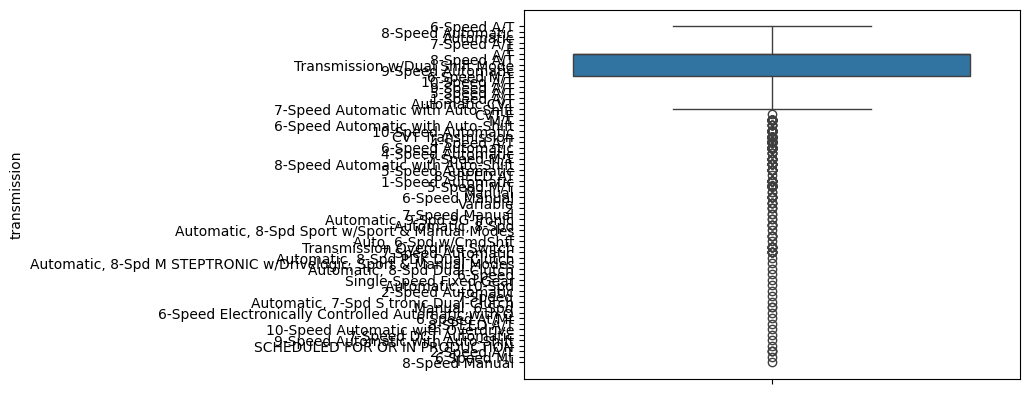

In [32]:
sns.boxplot(data=df["transmission"])

In [33]:
#Frequency encoding
df["transmission"].value_counts().sort_values(ascending=False)[:20]

transmission
A/T                               1037
8-Speed A/T                        406
Transmission w/Dual Shift Mode     398
6-Speed A/T                        362
6-Speed M/T                        248
Automatic                          237
7-Speed A/T                        209
8-Speed Automatic                  176
10-Speed A/T                       119
5-Speed A/T                         86
9-Speed A/T                         74
6-Speed Automatic                   73
4-Speed A/T                         72
1-Speed A/T                         64
CVT Transmission                    62
5-Speed M/T                         59
10-Speed Automatic                  56
9-Speed Automatic                   47
M/T                                 40
Automatic CVT                       37
Name: count, dtype: int64

In [34]:
pd.set_option("display.max_rows",None)
print(df.groupby("transmission")["price (in $)"].median().sort_values(ascending=False))
pd.reset_option("display.max_rows")

transmission
7-Speed                                                             749950.0
8-SPEED A/T                                                         289991.0
Automatic, 8-Spd Dual-Clutch                                        238900.0
Manual                                                              220748.0
7-Speed DCT Automatic                                               215000.0
7-Speed Manual                                                      211949.5
8-Speed Automatic with Auto-Shift                                   197750.0
7-Speed Automatic with Auto-Shift                                   188400.0
9-Speed Automatic with Auto-Shift                                   143900.0
Manual, 6-Spd                                                       125950.0
–                                                                   111499.0
10-Speed Automatic with Overdrive                                   109900.0
2-Speed Automatic                                              

In [35]:
# #Target encoding
# transmission_Price=df.groupby("transmission")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df["transmission"]=df["transmission"].map(transmission_Price)
# df.head()

In [36]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["transmission_encoded"]=le.fit_transform(df['transmission'])
df.drop("transmission",axis=1,inplace=True)
df.head()

,brand,model,fuel_type,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,0,1,11,10300,51000,14,29,16
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,0,1,3,38005,34742,71,185,32
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,1,0,2,54598,22372,14,38,40
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,1,1,9,15500,88900,14,29,23
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,1,0,3,34999,9835,14,120,32


### Encoding engine

In [37]:
#Target guided encoding
Engine_Price=df.groupby("engine")["price (in $)"].median().to_dict()
df["engine"]=df["engine"].map(Engine_Price)
df.head()

,brand,model,fuel_type,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,8450.0,0,1,11,10300,51000,14,29,16
1,Hyundai,Palisade SEL,Gasoline,43329.0,0,1,3,38005,34742,71,185,32
2,Lexus,RX 350 RX 350,Gasoline,54698.0,1,0,2,54598,22372,14,38,40
3,INFINITI,Q50 Hybrid Sport,Hybrid,17738.5,1,1,9,15500,88900,14,29,23
4,Audi,Q3 45 S line Premium Plus,Gasoline,34622.0,1,0,3,34999,9835,14,120,32


In [38]:
!pip install category_encoders

### Encoding Brand

In [39]:
#Target guided encoding
from category_encoders import TargetEncoder

encoder=TargetEncoder()
df['brand_encoded']=encoder.fit_transform(df['brand'],df['price (in $)'])
df.drop(['brand'],axis=1,inplace=True)
df.head()

,model,fuel_type,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,brand_encoded
0,Utility Police Interceptor Base,E85 Flex Fuel,8450.0,0,1,11,10300,51000,14,29,16,36240.880829
1,Palisade SEL,Gasoline,43329.0,0,1,3,38005,34742,71,185,32,19087.358900
2,RX 350 RX 350,Gasoline,54698.0,1,0,2,54598,22372,14,38,40,35668.526945
3,Q50 Hybrid Sport,Hybrid,17738.5,1,1,9,15500,88900,14,29,23,23356.701517
4,Q3 45 S line Premium Plus,Gasoline,34622.0,1,0,3,34999,9835,14,120,32,39907.430071


In [40]:
# Chances of data leakage
# brand_Price=df.groupby("brand")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df["brand"]=df["brand"].map(brand_Price)
# df.head()

### Encoding Fuel

In [41]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [42]:
df["fuel_type"].isnull().sum()

170

In [43]:
df.groupby("fuel_type")["price (in $)"].mean().sort_values(ascending=False)

fuel_type
Hybrid            51426.195876
Diesel            48695.422414
Plug-In Hybrid    45946.176471
Gasoline          44538.525839
–                 35745.888889
E85 Flex Fuel     22744.115108
not supported     14000.000000
Name: price (in $), dtype: float64

In [44]:
df["fuel_type"]=np.where(df["fuel_type"]=="–","not supported",df["fuel_type"])
df.head()

,model,fuel_type,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,brand_encoded
0,Utility Police Interceptor Base,E85 Flex Fuel,8450.0,0,1,11,10300,51000,14,29,16,36240.880829
1,Palisade SEL,Gasoline,43329.0,0,1,3,38005,34742,71,185,32,19087.358900
2,RX 350 RX 350,Gasoline,54698.0,1,0,2,54598,22372,14,38,40,35668.526945
3,Q50 Hybrid Sport,Hybrid,17738.5,1,1,9,15500,88900,14,29,23,23356.701517
4,Q3 45 S line Premium Plus,Gasoline,34622.0,1,0,3,34999,9835,14,120,32,39907.430071


In [45]:
df.groupby("fuel_type")["price (in $)"].mean().sort_values(ascending=False)

fuel_type
Hybrid            51426.195876
Diesel            48695.422414
Plug-In Hybrid    45946.176471
Gasoline          44538.525839
not supported     34820.531915
E85 Flex Fuel     22744.115108
Name: price (in $), dtype: float64

In [46]:
categoryCount=df['fuel_type'].value_counts()
[f"{categoryCount.index[i]} -> {categoryCount.values[i]}"for i in range(len(categoryCount))]

['Gasoline -> 3309',
 'Hybrid -> 194',
 'E85 Flex Fuel -> 139',
 'Diesel -> 116',
 'not supported -> 47',
 'Plug-In Hybrid -> 34']

In [47]:
#Target guided encoding
from category_encoders import TargetEncoder

encoder=TargetEncoder()
df['fuel_type_encoded']=encoder.fit_transform(df['fuel_type'],df['price (in $)'])
df.drop(['fuel_type'],axis=1,inplace=True)
df.head()

,model,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,brand_encoded,fuel_type_encoded
0,Utility Police Interceptor Base,8450.0,0,1,11,10300,51000,14,29,16,36240.880829,22744.263199
1,Palisade SEL,43329.0,0,1,3,38005,34742,71,185,32,19087.358900,44538.525839
2,RX 350 RX 350,54698.0,1,0,2,54598,22372,14,38,40,35668.526945,44538.525839
3,Q50 Hybrid Sport,17738.5,1,1,9,15500,88900,14,29,23,23356.701517,51426.195686
4,Q3 45 S line Premium Plus,34622.0,1,0,3,34999,9835,14,120,32,39907.430071,44538.525839


In [48]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df['fuel_type_Encoded']=le.fit_transform(df['fuel_type'])
# df.head()

### Encoding model

In [49]:
df['model'].value_counts()

model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Camaro 2SS                 17
                           ..
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Taycan                      1
Name: count, Length: 1898, dtype: int64

In [50]:
#Target guided encoding
print("Grouping by mean of price:\n",df.groupby("model")["price (in $)"].mean())
print("\n")
print("Grouping by median of price:\n",df.groupby("model")["price (in $)"].median())

Grouping by mean of price:
 model
124 Spider Abarth         22500.000000
128 i                     18000.000000
135 i                     13933.333333
135 is                    29000.000000
1500 Big Horn             38601.909091
                              ...     
i8 Base                   78189.800000
tC Anniversary Edition    11246.500000
tC Base                    7100.000000
tC Release Series 6.0      6500.000000
xB Base                    8000.000000
Name: price (in $), Length: 1898, dtype: float64


Grouping by median of price:
 model
124 Spider Abarth         22500.0
128 i                     18000.0
135 i                     15300.0
135 is                    29000.0
1500 Big Horn             42000.0
                           ...   
i8 Base                   85000.0
tC Anniversary Edition    11246.5
tC Base                    7100.0
tC Release Series 6.0      6500.0
xB Base                    8000.0
Name: price (in $), Length: 1898, dtype: float64


In [51]:
#Target guided encoding
from category_encoders import TargetEncoder

encoder=TargetEncoder()
df['model_encoded']=encoder.fit_transform(df['model'],df['price (in $)'])
df.drop(['model'],axis=1,inplace=True)
df.head()

,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,brand_encoded,fuel_type_encoded,model_encoded
0,8450.0,0,1,11,10300,51000,14,29,16,36240.880829,22744.263199,39313.750620
1,43329.0,0,1,3,38005,34742,71,185,32,19087.358900,44538.525839,42799.774211
2,54698.0,1,0,2,54598,22372,14,38,40,35668.526945,44538.525839,45860.105184
3,17738.5,1,1,9,15500,88900,14,29,23,23356.701517,51426.195686,40773.124054
4,34622.0,1,0,3,34999,9835,14,120,32,39907.430071,44538.525839,43310.109195


In [52]:
# Chances of Data Leakage and may lead to overfitting
##Target guided encoding
# model_Price=df.groupby("model")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df["model_encoded_Price"]=df["model"].map(model_Price)
# df.drop("model",axis=1,inplace=True)
# df.head()

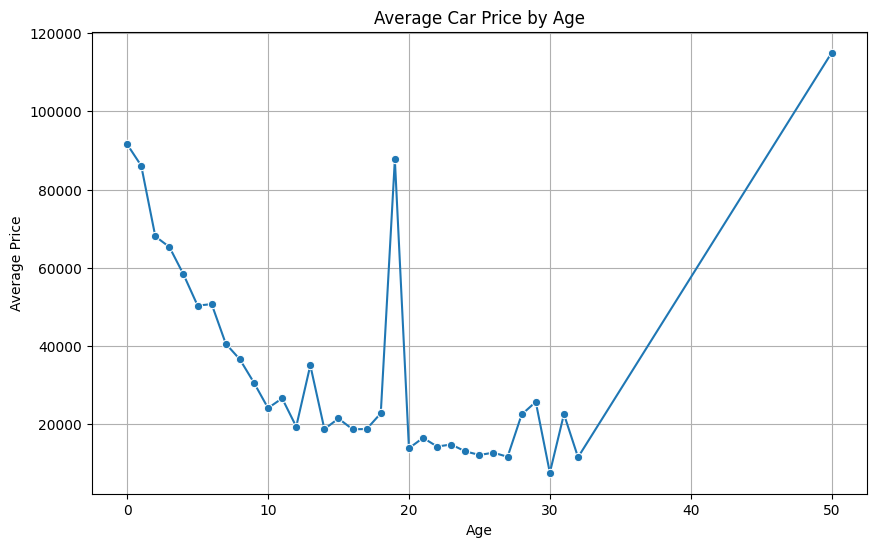

In [53]:
avg_price_per_year = df.groupby('Age')['price (in $)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='price (in $)', data=avg_price_per_year, marker='o')
plt.title('Average Car Price by Age')
plt.xlabel('Age')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### Handling outliers in the Age

<Axes: ylabel='Age'>

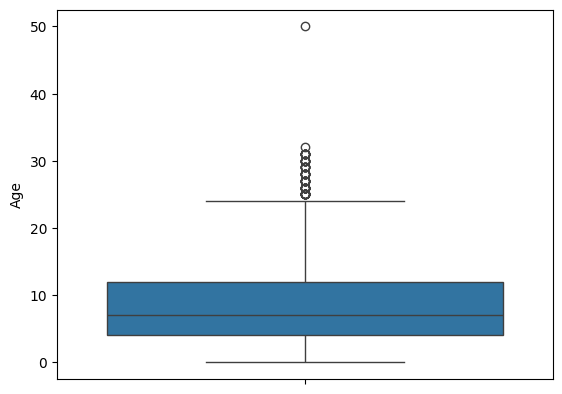

In [54]:
sns.boxplot(data=df["Age"])

In [55]:
df["Age"].isnull().sum()

0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Age_log'>

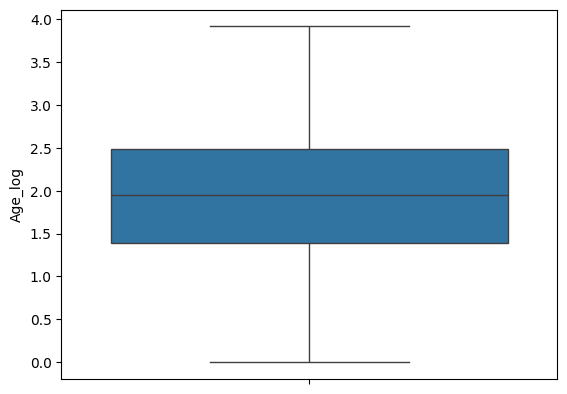

In [56]:
df['Age_log'] = np.log(df['Age'])
sns.boxplot(data=df["Age_log"])

In [57]:
df.head()

,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,brand_encoded,fuel_type_encoded,model_encoded,Age_log
0,8450.0,0,1,11,10300,51000,14,29,16,36240.880829,22744.263199,39313.750620,2.397895
1,43329.0,0,1,3,38005,34742,71,185,32,19087.358900,44538.525839,42799.774211,1.098612
2,54698.0,1,0,2,54598,22372,14,38,40,35668.526945,44538.525839,45860.105184,0.693147
3,17738.5,1,1,9,15500,88900,14,29,23,23356.701517,51426.195686,40773.124054,2.197225
4,34622.0,1,0,3,34999,9835,14,120,32,39907.430071,44538.525839,43310.109195,1.098612


### Decision Tree and the other ensemble techniques are not sensitive to outliers

In [58]:
df.isnull().sum()

engine                  0
accident                0
not_clean_title         0
Age                     0
price (in $)            0
mileage (in miles)      0
int_col_encoded         0
ext_col_encoded         0
transmission_encoded    0
brand_encoded           0
fuel_type_encoded       0
model_encoded           0
Age_log                 0
dtype: int64

In [59]:
df.corr()["price (in $)"]

engine                  0.767241
accident                0.114088
not_clean_title        -0.085710
Age                    -0.199496
price (in $)            1.000000
mileage (in miles)     -0.305528
int_col_encoded         0.064821
ext_col_encoded         0.004035
transmission_encoded    0.036943
brand_encoded           0.474709
fuel_type_encoded       0.062917
model_encoded           0.838209
Age_log                -0.230623
Name: price (in $), dtype: float64

In [60]:
df.head()

,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,brand_encoded,fuel_type_encoded,model_encoded,Age_log
0,8450.0,0,1,11,10300,51000,14,29,16,36240.880829,22744.263199,39313.750620,2.397895
1,43329.0,0,1,3,38005,34742,71,185,32,19087.358900,44538.525839,42799.774211,1.098612
2,54698.0,1,0,2,54598,22372,14,38,40,35668.526945,44538.525839,45860.105184,0.693147
3,17738.5,1,1,9,15500,88900,14,29,23,23356.701517,51426.195686,40773.124054,2.197225
4,34622.0,1,0,3,34999,9835,14,120,32,39907.430071,44538.525839,43310.109195,1.098612


In [61]:
X,y=df.drop('price (in $)',axis=1),df['price (in $)']

### Transformation

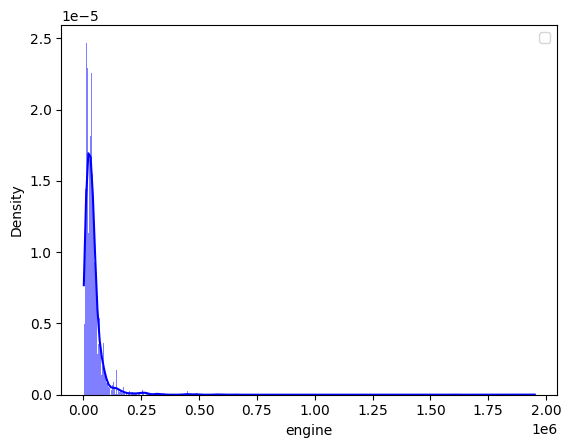

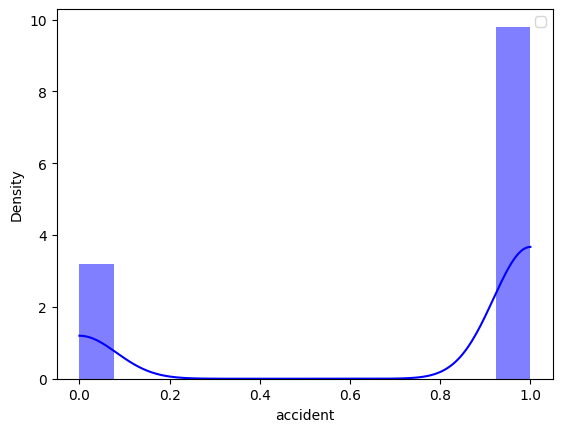

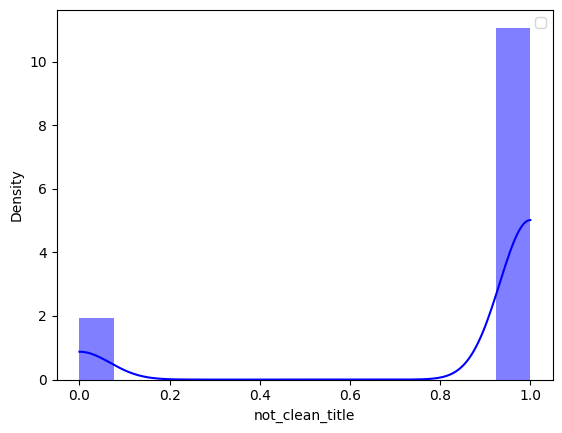

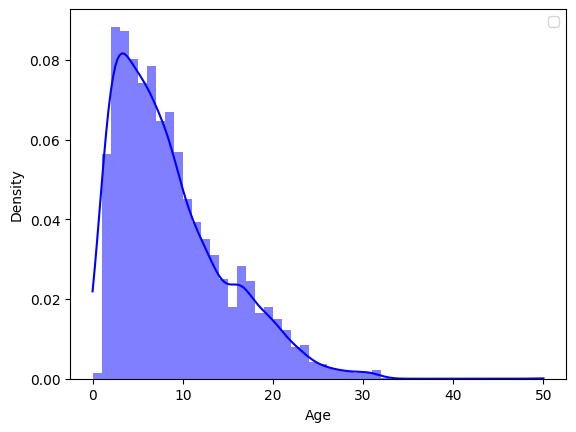

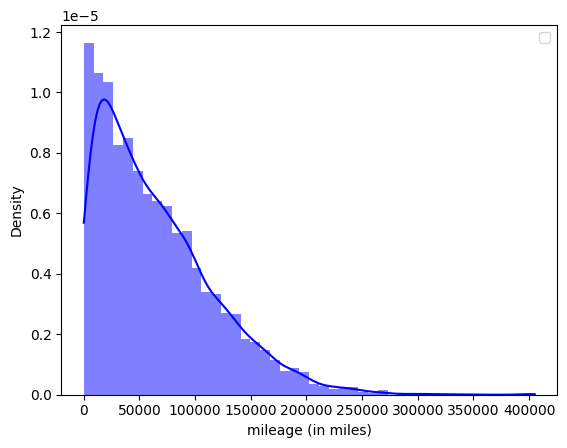

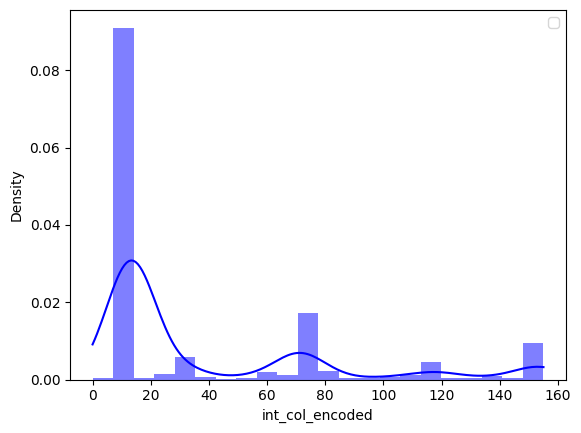

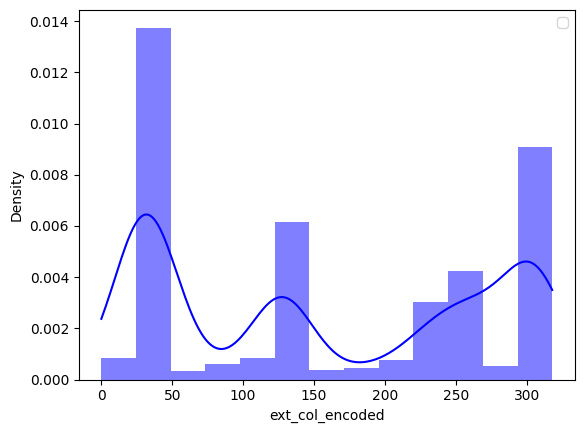

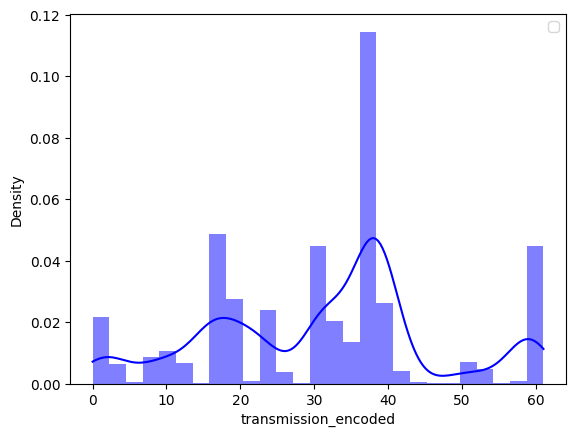

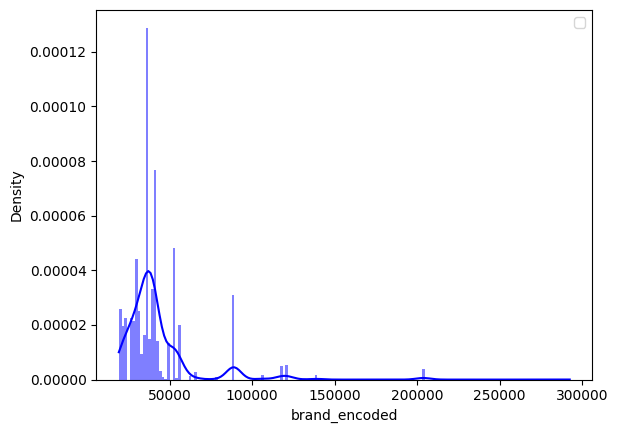

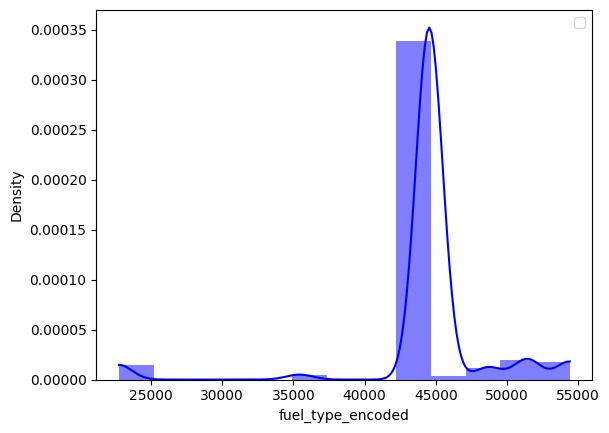

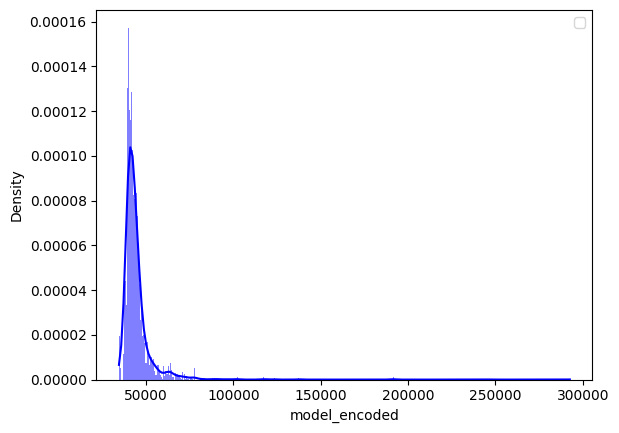

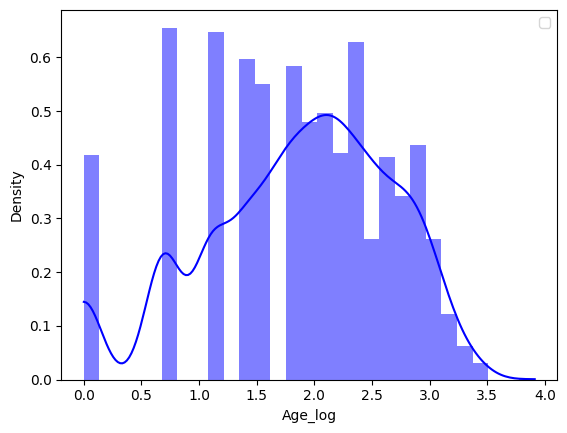

In [62]:
#Observing data distribution of all the datasets
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of features
for column in X.columns:
    sns.histplot(X[column], color="blue",legend='Data', kde=True, stat="density", linewidth=0)
    plt.legend()
    plt.show()

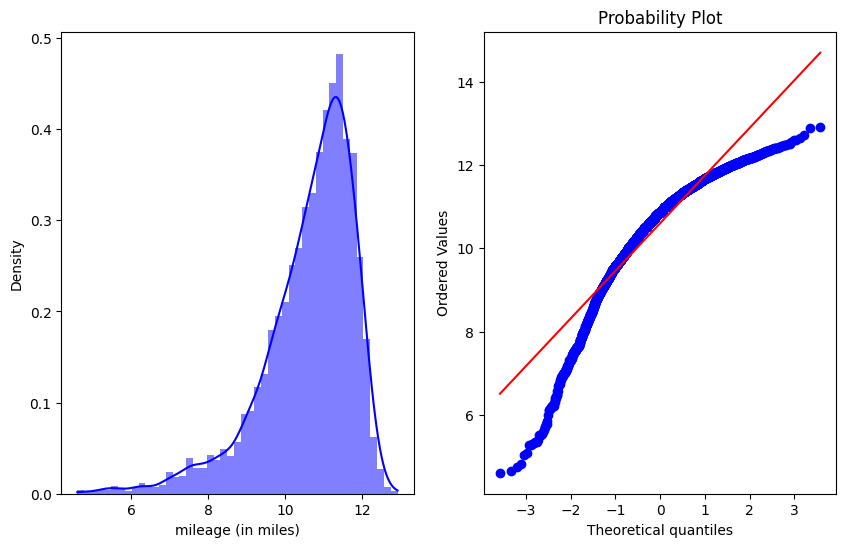

In [63]:
#Log Trnsformation
import numpy as np
from scipy import stats as stat

# Log transformation
transformed = np.log(df['mileage (in miles)'].replace(0, np.nan)).replace(np.nan, 0)

def plot_transformed_data(feature,transformed):
    # Visualize distribution of transformed data
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(transformed, color="blue", kde=True, stat="density", linewidth=0)
    plt.subplot(1,2,2)
    stat.probplot(transformed,dist='norm',plot=plt)
    plt.show()

plot_transformed_data('mileage (in miles)',transformed)

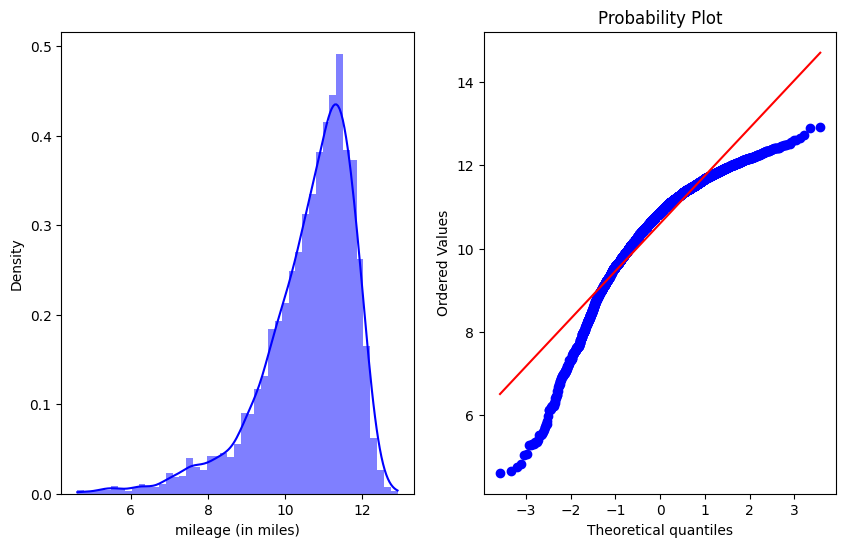

In [64]:
#Log1pTransformation
transformed=np.log1p(df['mileage (in miles)'])
plot_transformed_data('mileage (in miles)',transformed)

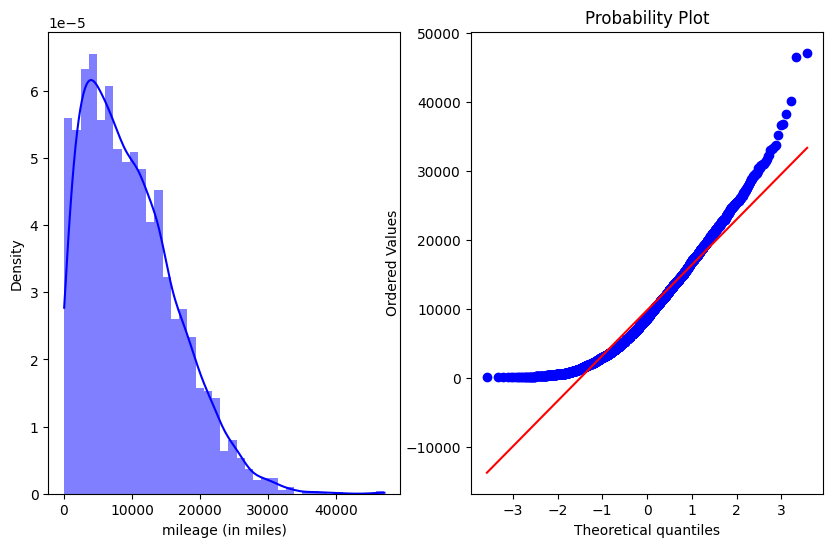

In [65]:
#Exponential Transformation
transformed=df['mileage (in miles)']**(1/1.2)
plot_transformed_data('mileage (in miles)',transformed)

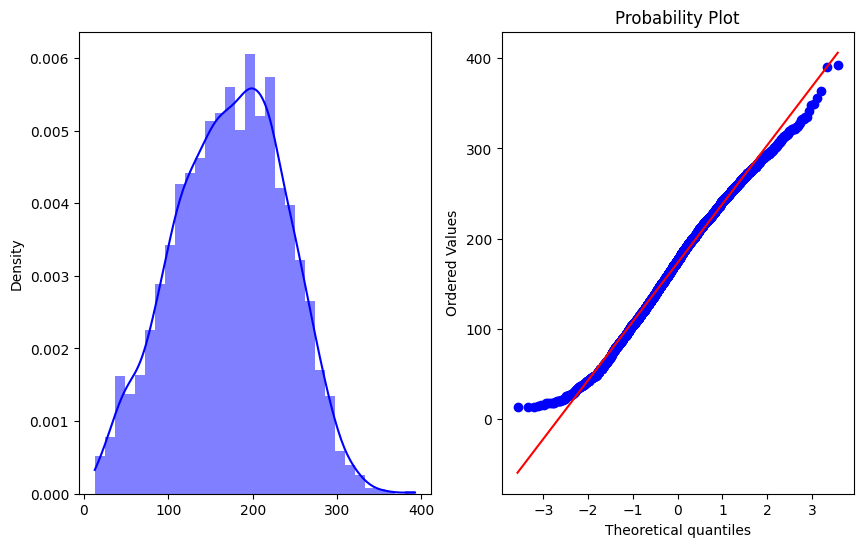

In [66]:
#Box-Cox transformation
transformed,lam=stat.boxcox(df['mileage (in miles)'])
plot_transformed_data('mileage (in miles)',transformed)

### Performing box cox transformation

In [67]:
transformed,lam=stat.boxcox(df['mileage (in miles)'])
df['mileage (in miles)']=transformed
df.head()

,engine,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,brand_encoded,fuel_type_encoded,model_encoded,Age_log
0,8450.0,0,1,11,10300,173.408869,14,29,16,36240.880829,22744.263199,39313.750620,2.397895
1,43329.0,0,1,3,38005,148.932051,71,185,32,19087.358900,44538.525839,42799.774211,1.098612
2,54698.0,1,0,2,54598,125.028089,14,38,40,35668.526945,44538.525839,45860.105184,0.693147
3,17738.5,1,1,9,15500,216.011714,14,29,23,23356.701517,51426.195686,40773.124054,2.197225
4,34622.0,1,0,3,34999,90.026593,14,120,32,39907.430071,44538.525839,43310.109195,1.098612


In [68]:
X,y=df.drop('price (in $)',axis=1),df['price (in $)']

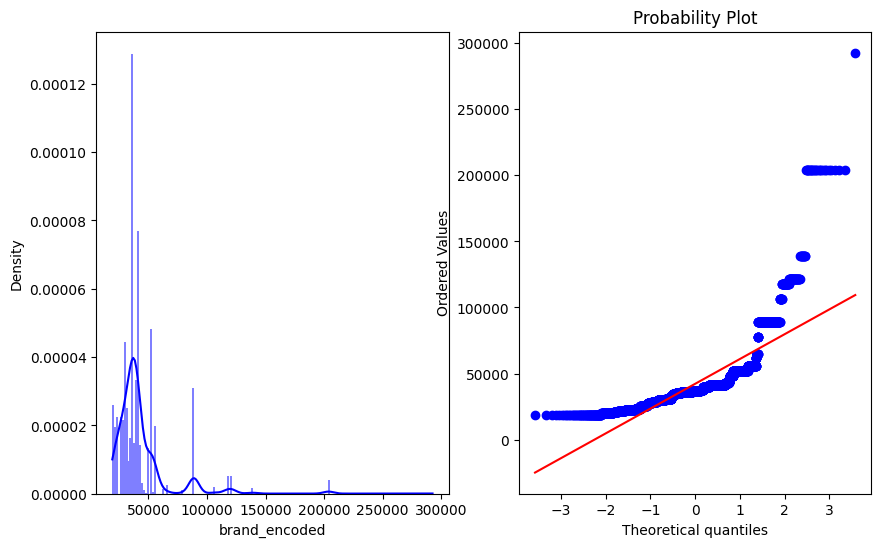

In [69]:
plot_transformed_data('model',df['brand_encoded'])

### Feature Scaling

In [70]:
from sklearn.impute import SimpleImputer
X[np.isinf(X)] = np.nan  # Replace infinity with NaN
imp = SimpleImputer(strategy='mean')  # Example imputation strategy
X_inpute = imp.fit_transform(X)
X=pd.DataFrame(X_inpute,columns=X.columns)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,engine,accident,not_clean_title,Age,mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,brand_encoded,fuel_type_encoded,model_encoded,Age_log
0,0.003156,0.0,1.0,0.22,0.422979,0.090323,0.091195,0.262295,0.062716,0.000000,0.018398,0.612955
1,0.021055,0.0,1.0,0.06,0.358480,0.458065,0.581761,0.524590,0.000000,0.688191,0.031908,0.280830
2,0.026889,1.0,0.0,0.04,0.295491,0.090323,0.119497,0.655738,0.060624,0.688191,0.043768,0.177184
3,0.007922,1.0,1.0,0.18,0.535243,0.090323,0.091195,0.377049,0.015609,0.905681,0.024054,0.561659
4,0.016586,1.0,0.0,0.06,0.203258,0.090323,0.377358,0.524590,0.076122,0.688191,0.033886,0.280830


### Train-Test-Val split

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)

### Linear Regression

In [73]:
df.corr()["price (in $)"]

engine                  0.767241
accident                0.114088
not_clean_title        -0.085710
Age                    -0.199496
price (in $)            1.000000
mileage (in miles)     -0.365595
int_col_encoded         0.064821
ext_col_encoded         0.004035
transmission_encoded    0.036943
brand_encoded           0.474709
fuel_type_encoded       0.062917
model_encoded           0.838209
Age_log                -0.230623
Name: price (in $), dtype: float64

In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

print(f"Train score of Linear Regression: {lr.score(X_train,y_train)}")
print(f"Train loss of Linear Regression: {1-lr.score(X_train,y_train)}")
print("\n")
print(f"Test score of Linear Regression: {lr.score(X_test,y_test)}")
print(f"Test loss of Linear Regression: {1-lr.score(X_test,y_test)}")

Train score of Linear Regression: 0.9029615644007548
Train loss of Linear Regression: 0.09703843559924519


Test score of Linear Regression: 0.6264133130967569
Test loss of Linear Regression: 0.37358668690324315


### SGD Regressor

In [75]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

sgd.fit(X_train,y_train)

print(f"Train score of SGD Regression: {sgd.score(X_train,y_train)}")
print(f"Train loss of SGD Regression: {1-sgd.score(X_train,y_train)}")
print("\n")
print(f"Val score of SGD Regression: {sgd.score(X_val,y_val)}")
print(f"Val loss of SGD Regression: {1-sgd.score(X_val,y_val)}")
print("\n")
print(f"Test score of SGD Regression: {sgd.score(X_test,y_test)}")
print(f"Test loss of SGD Regression: {1-sgd.score(X_test,y_test)}")

Train score of SGD Regression: 0.7782163752423192
Train loss of SGD Regression: 0.22178362475768076


Val score of SGD Regression: 0.7182777739988752
Val loss of SGD Regression: 0.28172222600112484


Test score of SGD Regression: 0.4509882989453322
Test loss of SGD Regression: 0.5490117010546678


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Decision Tree and Random Forest

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [77]:
dt.fit(X,y)
rf.fit(X,y)

print(f"Important features for decision tree: {dt.feature_importances_}")
print(f"Important features for random forest: {rf.feature_importances_}")


Important features for decision tree: [1.76050934e-01 1.41674480e-04 3.42500165e-05 1.22506943e-03
 1.39543673e-02 1.01665580e-01 1.97466718e-03 1.05999403e-03
 3.55276584e-03 4.72008037e-05 5.70864625e-01 1.29428871e-01]
Important features for random forest: [0.22795496 0.01483235 0.00076905 0.02880605 0.04909007 0.00590073
 0.02510839 0.01207495 0.01825861 0.00080104 0.58224215 0.03416163]


### Baseline Model

In [78]:
model0=dt.fit(X_train,y_train)
model1=rf.fit(X_train,y_train)

print(f"Train score of Decision Tree: {model0.score(X_train,y_train)}")
print(f"Train score of Random Forest: {model1.score(X_train,y_train)}")
print("\n")
print(f"Train loss of Decision Tree: {1-model0.score(X_train,y_train)}")
print(f"Train loss of Random Forest: {1-model1.score(X_train,y_train)}")

Train score of Decision Tree: 1.0
Train score of Random Forest: 0.9879652563546458


Train loss of Decision Tree: 0.0
Train loss of Random Forest: 0.012034743645354173


In [79]:
print(f"Val score of Decision Tree: {model0.score(X_val,y_val)}")
print(f"Val score of Random Forest: {model1.score(X_val,y_val)}")
print("\n")
print(f"Val loss of Decision Tree: {1-model0.score(X_val,y_val)}")
print(f"Val loss of Random Forest: {1-model1.score(X_val,y_val)}")

Val score of Decision Tree: 0.6090533769997252
Val score of Random Forest: 0.7855832508297794


Val loss of Decision Tree: 0.39094662300027483
Val loss of Random Forest: 0.21441674917022058


In [80]:
print(f"Test score of Decision Tree: {model0.score(X_test,y_test)}")
print(f"Test score of Random Forest: {model1.score(X_test,y_test)}")
print("\n")
print(f"Test loss of Decision Tree: {1-model0.score(X_test,y_test)}")
print(f"Test loss of Random Forest: {1-model1.score(X_test,y_test)}")

Test score of Decision Tree: 0.4995369273262704
Test score of Random Forest: 0.43805744228626897


Test loss of Decision Tree: 0.5004630726737296
Test loss of Random Forest: 0.561942557713731


### HyperParameter Tuning

In [81]:
param_grid_dt = {
    'max_depth': [7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter':['best','random'],
    'random_state':[42],
    'max_features':[1.0,'sqrt','log2']
}

param_grid_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2'],
}

In [82]:
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')

In [83]:
from sklearn.model_selection import cross_val_score
grid_search_dt.fit(X, y)

print(f"Best parameters for decision tree: {grid_search_dt.best_params_}")
print(f"Best score for decision tree: {grid_search_dt.best_score_}")

Best parameters for decision tree: {'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Best score for decision tree: 0.6815196636751437


In [84]:
model2=DecisionTreeRegressor(max_depth=10,max_features= 1.0,min_samples_leaf=1,min_samples_split=2, random_state= 42, splitter= 'random')

model2.fit(X_train,y_train)

print(f"Cross validation score for decision tree: {cross_val_score(model2, X_train, y_train, cv=5, scoring='r2').mean()}")

Cross validation score for decision tree: 0.8202095194309024


In [85]:
print(f"Validation score of Decision Tree: {model2.score(X_val,y_val)}")
print(f"Test score of Decision Tree: {model2.score(X_test,y_test)}")

Validation score of Decision Tree: 0.6367193356690732
Test score of Decision Tree: 0.4720943486674405


### XGB Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
print(f"Train score of XGB Regressor: {xgb.score(X_train,y_train)}")
print(f"Train loss of XGB Regressor: {1-xgb.score(X_train,y_train)}")
print("\n")
print(f"Val score of XGB Regressor: {xgb.score(X_val,y_val)}")
print(f"Val loss of XGB Regressor: {1-xgb.score(X_val,y_val)}")
print("\n")
print(f"Test score of XGB Regressor: {xgb.score(X_test,y_test)}")
print(f"Test loss of XGB Regressor: {1-xgb.score(X_test,y_test)}")

Train score of XGB Regressor: 0.9988774040756093
Train loss of XGB Regressor: 0.0011225959243906791


Val score of XGB Regressor: 0.8473022292695452
Val loss of XGB Regressor: 0.15269777073045476


Test score of XGB Regressor: 0.3682892687467605
Test loss of XGB Regressor: 0.6317107312532395
